In [150]:
from IPython.display import HTML
display(HTML('<img src="https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExY2s3cmJuODkxY2kxaWlhcTVjYWs4cXNrODNmazAwMHJoZnRoOHBmdyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/oenruB2DKC7p6/giphy.gif">'))

## Traitement CSV IMDB_MOVIES 

### 1.Librairies 

In [151]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [152]:


path_of_file = "C:\\Users\\BENYAHIA\\Desktop\\JEDHASeptembre25\\Netflix_Projet_Bloc2\\Dossier_Git\\1_Data_Raw\\imdb_movies.csv"

imdb_movies = pd.read_csv(path_of_file)

imdb_movies.head()



,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


### 2.Statistiques

In [153]:
imdb_movies.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


### 3. Type de donnees et conversion

In [154]:
# examiner le type des colonnes date

imdb_movies.dtypes

names          object
date_x         object
score         float64
genre          object
overview       object
crew           object
orig_title     object
status         object
orig_lang      object
budget_x      float64
revenue       float64
country        object
dtype: object

In [155]:
#Transformer la colonne date_x au bon format de date 
imdb_movies["date_x"]= pd.to_datetime(imdb_movies["date_x"], errors="coerce")
print(imdb_movies)

                                         names     date_x  score  \
0                                    Creed III 2023-03-02   73.0   
1                     Avatar: The Way of Water 2022-12-15   78.0   
2                  The Super Mario Bros. Movie 2023-04-05   76.0   
3                                      Mummies 2023-01-05   70.0   
4                                    Supercell 2023-03-17   61.0   
...                                        ...        ...    ...   
10173                       20th Century Women 2016-12-28   73.0   
10174  Delta Force 2: The Colombian Connection 1990-08-24   54.0   
10175                         The Russia House 1990-12-21   61.0   
10176         Darkman II: The Return of Durant 1995-07-11   55.0   
10177       The Swan Princess: A Royal Wedding 2020-07-20   70.0   

                                                   genre  \
0                                          Drama, Action   
1                     Science Fiction, Adventure, Action   
2  

In [156]:
#Convertir les titres au meme format et supprimer les caracteres spéciaux 

imdb_movies["names"] = (
    imdb_movies["names"]
    .str.upper()                          # Majuscules
    .str.normalize("NFD")                 # Normalisation des caractères accentués
    .str.encode("ascii", "ignore")        # Suppression des accents
    .str.decode("utf-8")
    .str.replace(r"[^A-Z0-9 ]", "", regex=True)  # Enlever caractères spéciaux
    .str.replace(r"\s+", " ", regex=True)        # Réduire espaces multiples
    .str.strip()                          # Enlever espaces en début/fin
)

### 4. Vérification des abbérations

In [157]:
imdb_movies["date_x"].min(),imdb_movies["date_x"].max()


(Timestamp('1903-05-15 00:00:00'), Timestamp('2023-12-31 00:00:00'))

In [158]:
imdb_movies["score"].min(),imdb_movies["score"].max()

(0.0, 100.0)

In [159]:
imdb_movies["status"].unique()

array([' Released', ' Post Production', ' In Production'], dtype=object)

### 5. Valeurs null

In [160]:
imdb_movies.isna().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [161]:
(imdb_movies=="").sum()

names         7
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

### 6. Valeurs en double : Clé primaire (Names)

In [162]:
print("\nNombre de lignes dupliquées (complètement identiques):", imdb_movies.duplicated().sum())



Nombre de lignes dupliquées (complètement identiques): 0


In [163]:
#Verification des doublons sur la colonne "name" 
unique_origin_title = imdb_movies['names'].nunique()
print(f"Nombre de Titres uniques :{unique_origin_title}")
taille_dataset= len(imdb_movies)
print(f"Nombre de ligne du dataset:{taille_dataset}")
print(f"Nombre de titres en double:{taille_dataset-unique_origin_title}")


Nombre de Titres uniques :9636
Nombre de ligne du dataset:10178
Nombre de titres en double:542


In [164]:
display(imdb_movies)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,CREED III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,AVATAR THE WAY OF WATER,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,THE SUPER MARIO BROS MOVIE,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,MUMMIES,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,SUPERCELL,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20TH CENTURY WOMEN,2016-12-28,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,DELTA FORCE 2 THE COLOMBIAN CONNECTION,1990-08-24,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,THE RUSSIA HOUSE,1990-12-21,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,DARKMAN II THE RETURN OF DURANT,1995-07-11,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


In [165]:
(imdb_movies=="").sum()

names         7
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

In [166]:
imdb_movies.isna().sum()


names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [167]:
# Supprimer lignes où 'names' est vide ou ne contient que des espaces
imdb_movies = imdb_movies[~imdb_movies["names"].str.strip().eq("")]


In [168]:
(imdb_movies=="").sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

In [169]:
unique_origin_title = imdb_movies['names'].nunique()
print(f"Nombre de Titres uniques :{unique_origin_title}")
taille_dataset= len(imdb_movies)
print(f"Nombre de ligne du dataset:{taille_dataset}")
print(f"Nombre de titres en double:{taille_dataset-unique_origin_title}")

Nombre de Titres uniques :9635
Nombre de ligne du dataset:10171
Nombre de titres en double:536


In [170]:
duplicates = imdb_movies[imdb_movies["names"].duplicated(keep=False)]
print(duplicates)


                             names     date_x  score  \
8                  ATTACK ON TITAN 2022-09-30   59.0   
11                    THE EXORCIST 2022-11-02   55.0   
54                       CHAMPIONS 2023-03-09   68.0   
56                           TROLL 2022-12-01   68.0   
65                    THE ENFORCER 2022-12-01   74.0   
...                            ...        ...    ...   
10060                    VENGEANCE 2009-05-20   66.0   
10075  THE HUNCHBACK OF NOTRE DAME 1939-12-29   73.0   
10134       LADY CHATTERLEYS LOVER 2015-09-06   64.0   
10153                      PAYBACK 2021-02-05   60.0   
10158                   THE MASTER 1992-05-28   64.0   

                                      genre  \
8                   Action, Science Fiction   
11                                   Horror   
54                                   Comedy   
56     Fantasy, Action, Adventure, Thriller   
65           Action, Crime, Drama, Thriller   
...                                     ...  

In [171]:
# 1. Supprimer d'abord les films avec un revenu à zéro
imdb_movies = imdb_movies[imdb_movies["revenue"] != 0]




In [172]:
unique_origin_title = imdb_movies['names'].nunique()
print(f"Nombre de Titres uniques :{unique_origin_title}")
taille_dataset= len(imdb_movies)
print(f"Nombre de ligne du dataset:{taille_dataset}")
print(f"Nombre de titres en double:{taille_dataset-unique_origin_title}")

Nombre de Titres uniques :9581
Nombre de ligne du dataset:10098
Nombre de titres en double:517


In [173]:
# 2. Supprimer les doublons sur le titre
imdb_movies = imdb_movies.drop_duplicates(subset="names", keep="first")

In [174]:
unique_origin_title = imdb_movies['names'].nunique()
print(f"Nombre de Titres uniques :{unique_origin_title}")
taille_dataset= len(imdb_movies)
print(f"Nombre de ligne du dataset:{taille_dataset}")
print(f"Nombre de titres en double:{taille_dataset-unique_origin_title}")

Nombre de Titres uniques :9581
Nombre de ligne du dataset:9581
Nombre de titres en double:0


In [175]:
# 3. supprimer la colonne "origin title" en doublons avec titles afin d'alléger le csv
imdb_movies.drop(columns=['orig_title'], inplace=True)


In [176]:
# 4. supprimer la colonne "overview" 
imdb_movies.drop(columns=['overview'], inplace=True)

C:\Users\BENYAHIA\AppData\Local\Temp\ipykernel_13920\1173456574.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="genre", data=imdb_movies, palette="Set2", order=imdb_movies['genre'].value_counts().index[0:15])


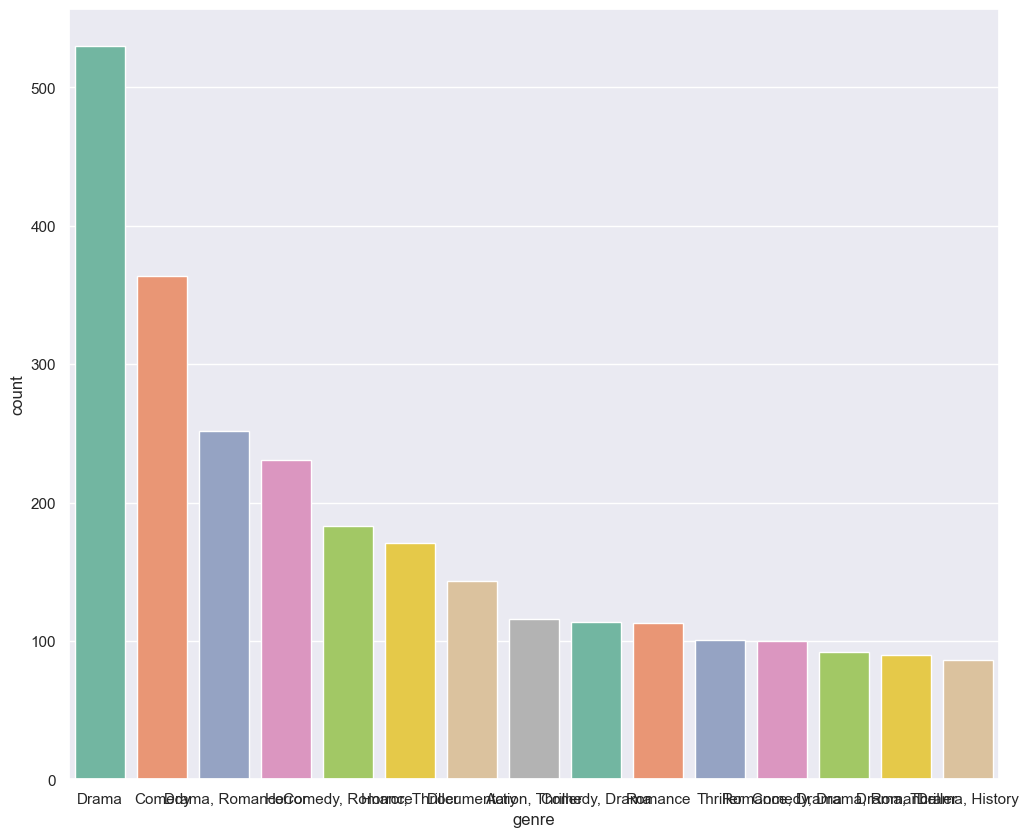

In [202]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="genre", data=imdb_movies, palette="Set2", order=imdb_movies['genre'].value_counts().index[0:15])























______________________________________________________________________________________________________________________________________________________

#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#


## Traitement CSV Netflix_titles

In [178]:

path_of_file = "C:\\Users\\BENYAHIA\\Desktop\\JEDHASeptembre25\\Netflix_Projet_Bloc2\\Dossier_Git\\1_Data_Raw\\netflix_titles.csv"

titles = pd.read_csv(path_of_file)

titles.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 2. Statistiques 

In [179]:
titles.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [180]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### 3. Type de donnees et conversion

In [181]:
#Transformer la colonne date_x au bon format de date 
titles["date_added"] = pd.to_datetime(titles["date_added"], errors="coerce")


C:\Users\BENYAHIA\AppData\Local\Temp\ipykernel_13920\2261059377.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  titles["date_added"] = pd.to_datetime(titles["date_added"], errors="coerce")


In [182]:
titles["title"] = (
    titles["title"]
    .str.upper()                          # Majuscules
    .str.normalize("NFD")                 # Normalisation des caractères accentués
    .str.encode("ascii", "ignore")        # Suppression des accents
    .str.decode("utf-8")
    .str.replace(r"[^A-Z0-9 ]", "", regex=True)  # Enlever caractères spéciaux
    .str.replace(r"\s+", " ", regex=True)        # Réduire espaces multiples
    .str.strip()                          # Enlever espaces en début/fin
)

### 4. Vérification des abbérations 

In [183]:
#Vérification de la plus ancienne et la plus récente date sur la colonne release year 
titles["release_year"].min(),titles["release_year"].max()


(1925, 2021)

In [184]:
(titles=="").sum()

show_id          0
type             0
title           10
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [185]:
#Vérification de la plus ancienne et la plus récente date sur la colonne date added
titles["date_added"].min(),titles["date_added"].max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-09-25 00:00:00'))

In [186]:
#verification des "Rating" Abbérants 
titles['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [187]:
mask = titles['rating'].str.contains('min', na=False)

titles.loc[mask, 'duration'] = titles.loc[mask, 'rating']
titles.loc[mask, 'rating'] = np.nan


In [188]:
titles['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

C:\Users\BENYAHIA\AppData\Local\Temp\ipykernel_13920\670728810.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="rating", data=titles, palette="Set2", order=titles['rating'].value_counts().index[0:15])


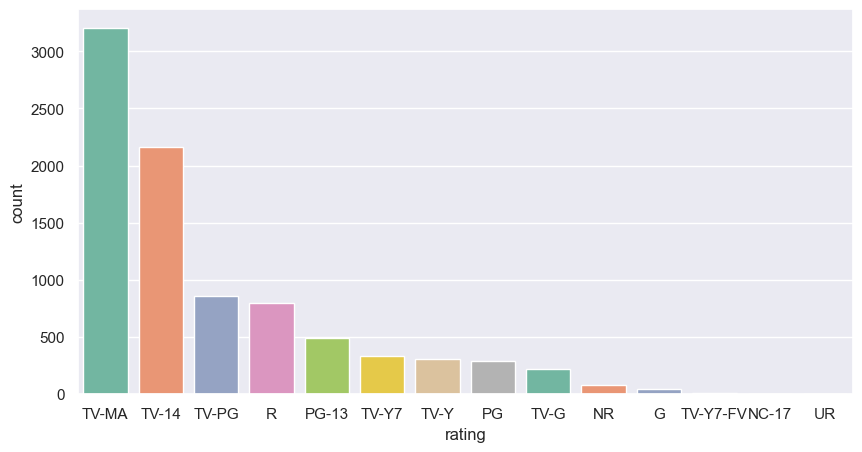

In [189]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=titles, palette="Set2", order=titles['rating'].value_counts().index[0:15])

In [190]:
titles['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

C:\Users\BENYAHIA\AppData\Local\Temp\ipykernel_13920\32110802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="type", data=titles, palette="Set1")


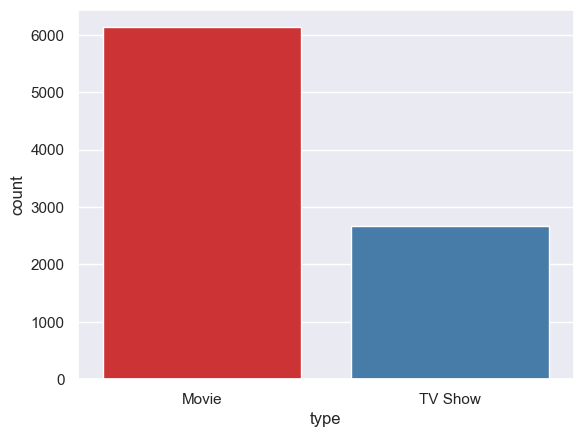

In [191]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=titles, palette="Set1")

C:\Users\BENYAHIA\AppData\Local\Temp\ipykernel_13920\1285926177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="listed_in", data=titles, palette="Set2", order=titles['listed_in'].value_counts().index[0:15])


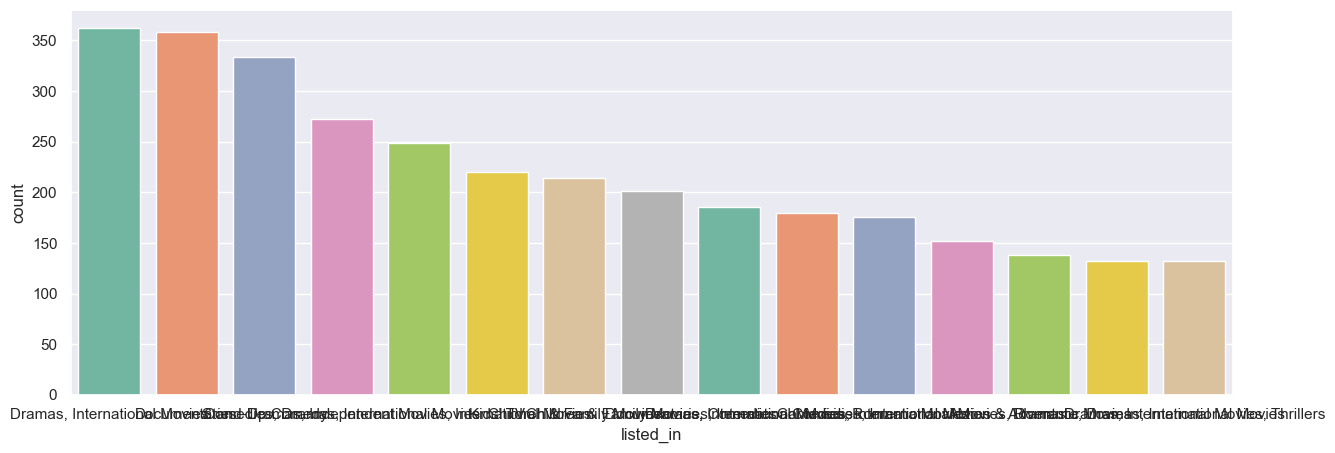

In [205]:
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="listed_in", data=titles, palette="Set2", order=titles['listed_in'].value_counts().index[0:15])

### 5.Vérification Valeurs nulles 


In [192]:
print("\nNombre de lignes dupliquées (complètement identiques):", titles.duplicated().sum())


Nombre de lignes dupliquées (complètement identiques): 0


### 6.Vérification Valeurs double 'Clé primaire Titles"

In [193]:
unique_origin_title = titles['title'].nunique()
print(f"Nombre de Titres uniques :{unique_origin_title}")
taille_dataset= len(titles)
print(f"Nombre de ligne du dataset:{taille_dataset}")
print(f"Nombre de titres en double:{taille_dataset-unique_origin_title}")

Nombre de Titres uniques :8784
Nombre de ligne du dataset:8807
Nombre de titres en double:23


In [194]:
titles.isna().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [195]:
display(titles)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,DICK JOHNSON IS DEAD,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,BLOOD WATER,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,GANGLANDS,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,JAILBIRDS NEW ORLEANS,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,KOTA FACTORY,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,ZODIAC,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,ZOMBIE DUMB,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,ZOMBIELAND,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,ZOOM,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [196]:
unique_origin_title = titles['title'].nunique()
print(f"Nombre de Titres uniques :{unique_origin_title}")
taille_dataset= len(titles)
print(f"Nombre de ligne du dataset:{taille_dataset}")
print(f"Nombre de titres en double:{taille_dataset-unique_origin_title}")

Nombre de Titres uniques :8784
Nombre de ligne du dataset:8807
Nombre de titres en double:23


In [197]:
# 1.Supprimer lignes où 'titles' est vide ou ne contient que des espaces
titles = titles[~titles["title"].str.strip().eq("")]

In [198]:
(titles=="").sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [199]:
# 2. Supprimer les doublons sur le titre
titles = titles.drop_duplicates(subset="title", keep="first")

In [200]:
unique_origin_title = titles['title'].nunique()
print(f"Nombre de Titres uniques :{unique_origin_title}")
taille_dataset= len(titles)
print(f"Nombre de ligne du dataset:{taille_dataset}")
print(f"Nombre de titres en double:{taille_dataset-unique_origin_title}")

Nombre de Titres uniques :8783
Nombre de ligne du dataset:8783
Nombre de titres en double:0


## Tables nettoyées sauvegardées 

In [201]:
titles.to_csv("C:\\Users\\BENYAHIA\\Desktop\\JEDHASeptembre25\\Netflix_Projet_Bloc2\\Dossier_Git\\2_Data_clean\\titles_clean.csv", index=False)
imdb_movies.to_csv("C:\\Users\\BENYAHIA\\Desktop\\JEDHASeptembre25\\Netflix_Projet_Bloc2\\Dossier_Git\\2_Data_clean\\imdb_clean.csv", index=False)